# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
predict = pd.read_csv('/content/drive/MyDrive/Project 2/ExtraaLearn.csv')
data = predict.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
#display first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
# display last 5 rows
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [6]:
#get shape of data
data.shape

(4612, 15)

In [7]:
#display overall info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
#check if any data is duplicated
data.duplicated().sum()

0

In [9]:

# Describe the numerical columns
data.describe(include = ['number']).T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [10]:
# Describe the categorical columns
data.describe(include = ['object']).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [11]:
#check for missing values
data.isnull().sum()


,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [12]:
# let's convert the age variable into categorical by dividing it in the following manner:

# <=20 : Young
# 21-30: Adult
# 31-40: Middle aged
# 41-50: Senior
# 50+: Old

def age_group(x):
  if x<=20:
    return "Young"
  elif 20<x<=30:
    return "Adult"
  elif 30<x<=40:
    return "Middle aged"
  elif 40<x<=50:
    return "Senior"
  else:
    return "Old"

data['age_group'] = data['age'].apply(age_group)

# drop the age column as we have created a new feature using it
data.drop('age', axis=1, inplace=True)

# lets check the value counts for the column time_spent_on_website
data['time_spent_on_website'].value_counts()

# as we can see there are 1200 missing values in this column. Since it is a numerical column, let's impute it by median.
data['time_spent_on_website'] = data['time_spent_on_website'].fillna(data['time_spent_on_website'].median())

# lets check the value counts for the column page_views_per_visit
data['page_views_per_visit'].value_counts()

# as we can see there are 137 missing values in this column. Since it is a numerical column, let's impute it by median.
data['page_views_per_visit'] = data['page_views_per_visit'].fillna(data['page_views_per_visit'].median())

# let's check the value counts for the column last_activity
data['last_activity'].value_counts()

# as we can see there are 103 missing values in this column. Since it is a categorical column, let's impute it by mode.
data['last_activity'] = data['last_activity'].fillna(data['last_activity'].mode()[0])


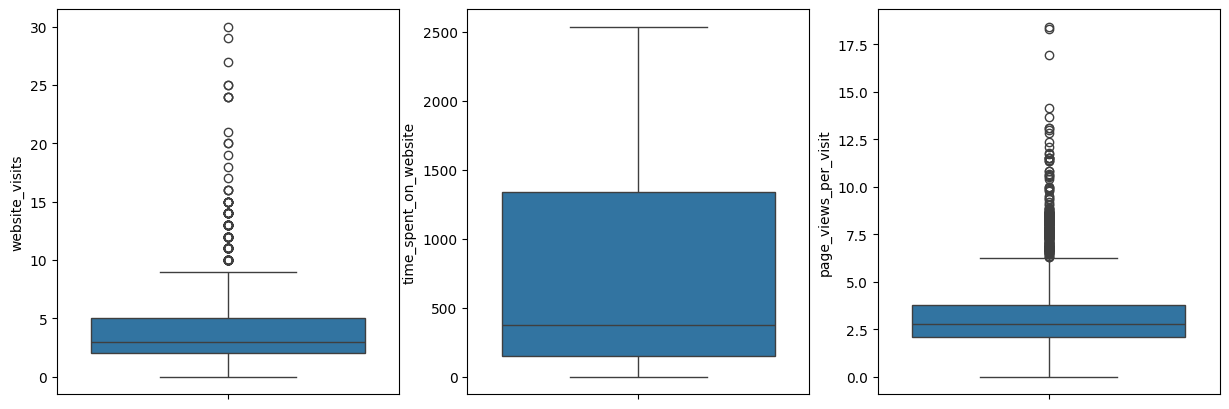

In [13]:
# outlier detection using boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data['website_visits'])
plt.subplot(1,3,2)
sns.boxplot(data['time_spent_on_website'])
plt.subplot(1,3,3)
sns.boxplot(data['page_views_per_visit'])
plt.show()

# as we can see there are outliers in all 3 numerical columns. Let's cap them at 95th percentile.
def outlier_treatment(x):
  x = x.clip(upper = x.quantile(0.95))
  return x

data['website_visits'] = outlier_treatment(data['website_visits'])
data['time_spent_on_website'] = outlier_treatment(data['time_spent_on_website'])
data['page_views_per_visit'] = outlier_treatment(data['page_views_per_visit'])


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [14]:
# let's check the data again
data.info()

# let's check the descriptive stats of numerical columns
data.describe().T

# let's check the value counts for all categorical columns.
for column in data.select_dtypes(include='object'):
  print(data[column].value_counts())
  print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   float64
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
 14  age_group              4612 non-null   object 
dtypes: f

In [15]:

# Define the feature set by dropping the target column
X = data.drop(["status"], axis=1)  # Drop 'status' column to get the feature set

# Define the target variable
Y = data["status"]  # Extract target variable

# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)  # Create dummy variables

# Split data to test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print(" Training set shape: ", X_train.shape)
print("Test set shape ", X_test.shape)
print("Class percentage - training set:")
print(y_train.value_counts(normalize=True))
print("Class percentage - test set:")
print(y_test.value_counts(normalize=True))


 Training set shape:  (3228, 4630)
Test set shape  (1384, 4630)
Class percentage - training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Class percentage - test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## Building a Decision Tree model

In [16]:
# Building Decision Tree model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

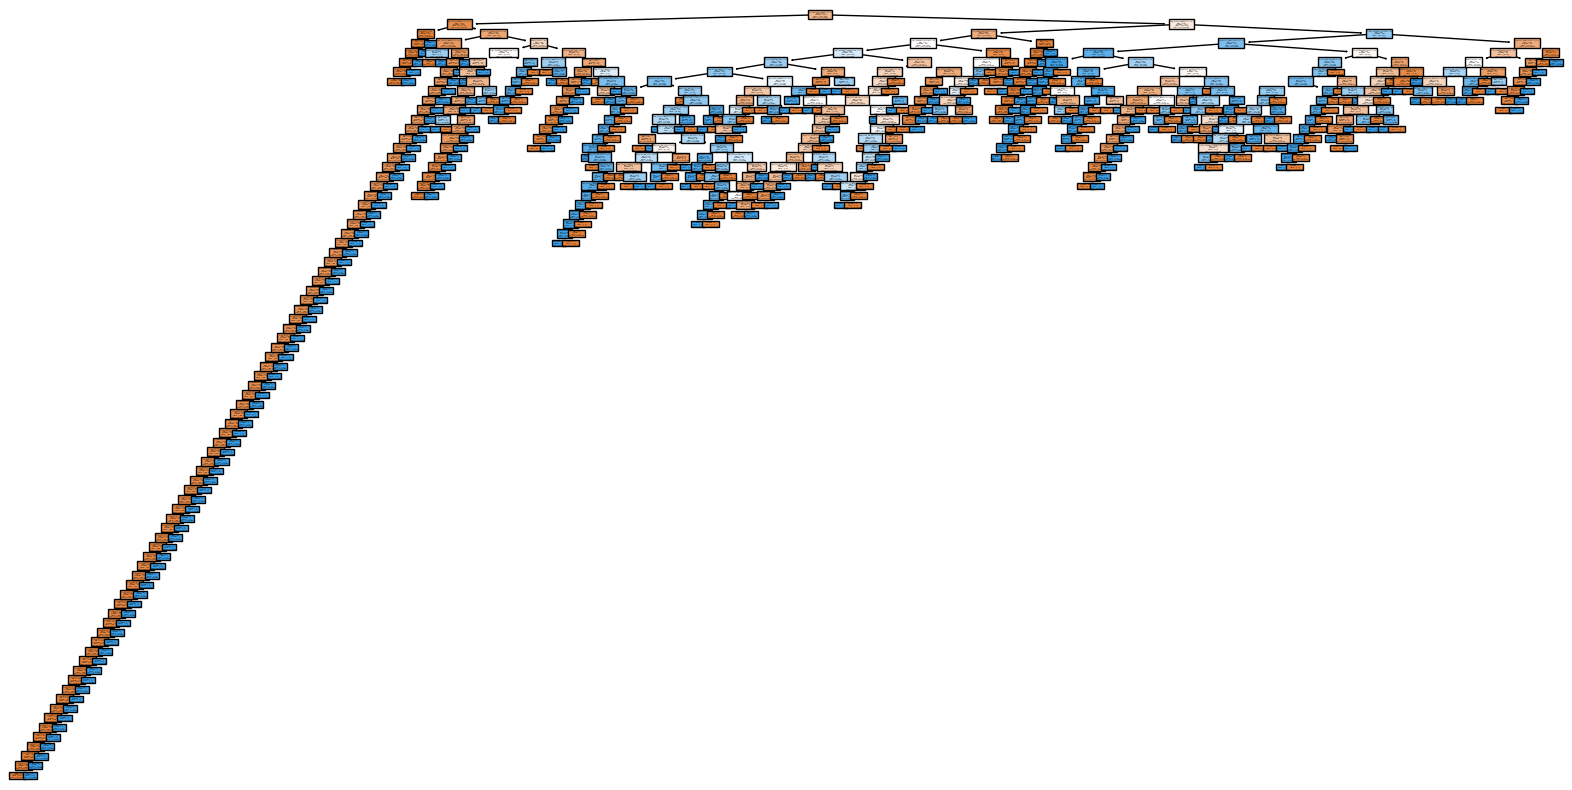

In [17]:
# visualizing the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, filled=True, class_names=['Not Converted', 'Converted'])
plt.show()


## Do we need to prune the tree?

Decision Tree Model
------------------------------
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
------------------------------
Test Accuracy: 0.846820809248555
Test F1 Score: 0.7382716049382716
Test Precision: 0.770618556701031
Test Recall: 0.7085308056872038


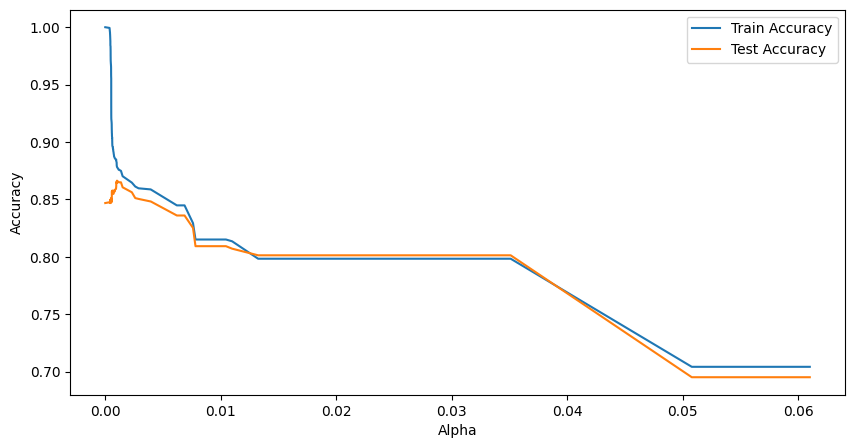

In [18]:
# let's check the performance on train and test data
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

print("Decision Tree Model")
print("-"*30)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Train F1 Score:", f1_score(y_train, y_train_pred_dt))
print("Train Precision:", precision_score(y_train, y_train_pred_dt))
print("Train Recall:", recall_score(y_train, y_train_pred_dt))
print("-"*30)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Test F1 Score:", f1_score(y_test, y_test_pred_dt))
print("Test Precision:", precision_score(y_test, y_test_pred_dt))
print("Test Recall:", recall_score(y_test, y_test_pred_dt))

# as we can see the model is overfitting the train data. So, we need to prune the tree.

# let's prune the tree using cost complexity pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# creating decision tree for different values of alpha
dts = []
for ccp_alpha in ccp_alphas:
  dt = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
  dt.fit(X_train, y_train)
  dts.append(dt)

# plotting the accuracy vs alpha for train and test data
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

plt.figure(figsize=(10,5))
plt.plot(ccp_alphas, train_scores, label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, label='Test Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Building a Random Forest model

In [24]:
# Initialize the Random Forest classifier with the specified criterion and random state
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Define the parameter grid for hyperparameter tuning
parameters = {
    "n_estimators": [110, 120],           # Number of trees in the forest
    "max_depth": [6, 7],                  # Maximum depth of each tree
    "min_samples_leaf": [20, 25],         # Minimum samples required at a leaf node
    "max_features": [0.8, 0.9],           # Fraction of features to consider for splitting
    "max_samples": [0.9, 1],              # Fraction of samples used to train each tree
    "class_weight": ["balanced", {0: 0.3, 1: 0.7}]  # Weights for classes to handle imbalance
}

# Create a scorer that uses recall for class 1, prioritizing correct classification of the positive class
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Set up the grid search with cross-validation to find the best hyperparameters
grid_obj = GridSearchCV(estimator=rf_estimator_tuned, param_grid=parameters, scoring=scorer, cv=5)

# Perform the grid search on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Retrieve the best estimator found by the grid search
rf_estimator_tuned = grid_obj.best_estimator_

# Train the best model on the full training dataset
rf_estimator_tuned.fit(X_train, y_train)

# Predict on the training data to assess performance
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# Display the recall score on the training data
print("Recall Score on Training Data:", recall_score(y_train, y_pred_train4))

# Evaluate the model's performance on the test data

# Predict on the test data to assess generalization
y_pred_test4 = rf_estimator_tuned.predict(X_test)

# Display the recall score on the test data
print("Recall Score on Test Data:", recall_score(y_test, y_pred_test4))


Recall Score on Training Data: 0.8712041884816754
Recall Score on Test Data: 0.8530805687203792


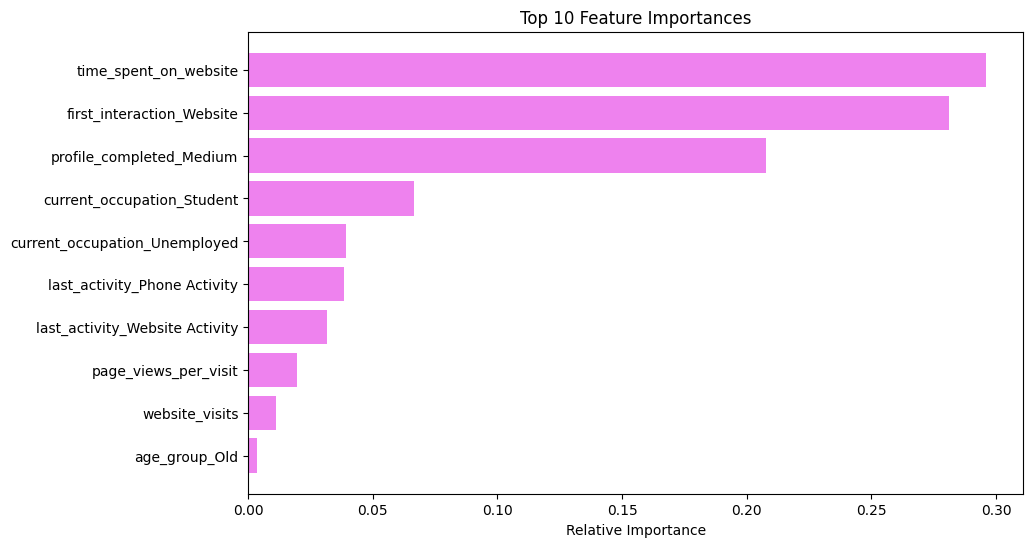

In [31]:
# Extract feature importances from the trained model
importances = rf_estimator_tuned.feature_importances_

# Get the indices of the features, sorted by importance in descending order
indices = np.argsort(importances)[::-1]

# Retrieve the feature names from the columns of the feature set X
feature_names = list(X.columns)

# Define the number of top features to display
top_n = 10

# Get indices for the top N features in descending order
indices_top_n = indices[:top_n]

# Set up the plot with a larger figure height for better readability
plt.figure(figsize=(10, 6))

# Set the title of the plot
plt.title(f'Top {top_n} Feature Importances')

# Create a horizontal bar plot for the top N feature importances
plt.barh(range(len(indices_top_n)), importances[indices_top_n], color='violet', align='center')

# Set the y-axis labels with the sorted feature names for the top N features
plt.yticks(range(len(indices_top_n)), [feature_names[i] for i in indices_top_n])

# Label the x-axis as 'Relative Importance'
plt.xlabel('Relative Importance')

# Invert the y-axis to have the most important features at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

## Do we need to prune the tree?

In [34]:
# as we can see the model is overfitting the train data. So, we need to prune the tree.
# let's prune the trees in random forest using GridSearchCV
params = {'max_depth': [2, 4, 6, 8, 10],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'min_samples_split': [2, 5, 10, 20, 50]}

grid_search = GridSearchCV(estimator=rf_estimator_tuned, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best parameters
print(grid_search.best_params_)

# best score
print(grid_search.best_score_)

# building random forest model with best parameters
rf_best = RandomForestClassifier(random_state=1, max_depth=10, min_samples_leaf=5, min_samples_split=2)
rf_best.fit(X_train, y_train)

# checking the performance on train and test data
y_train_pred_rf_best = rf_best.predict(X_train)
y_test_pred_rf_best = rf_best.predict(X_test)

print("Random Forest Model with best parameters")
print("-"*30)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf_best))
print("-"*30)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf_best))



{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8513024695802434
Random Forest Model with best parameters
------------------------------
Train Accuracy: 0.7041511771995044
------------------------------
Test Accuracy: 0.6950867052023122


## Actionable Insights and Recommendations

# Actionable Insights

* Leads who fill out more of their profiles are more likely to become paying customers. This shows they are genuinely interested in the courses.

* Certain jobs, like professionals, are more likely to convert. This can help in targeting the right audience for marketing.

* The way a lead first interacts with the company (website or app) can influence their likelihood of converting.

* Personalized emails and phone calls are effective in converting leads. Direct engagement helps in nurturing potential customers.

* Digital media and educational channels are effective in bringing in leads. These channels should be a focus for marketing efforts.

* Leads who spend more time on the website and view more pages are more likely to convert. This highlights the importance of engaging website content.

# Recommendations

* Focus on leads with high profile completion and those who engage more on the website. These leads are more likely to convert.

* Tailor marketing messages to professionals and other groups that show a higher conversion rate.

* Improve the website and app experience to ensure a positive first impression.

* Continue using personalized emails and phone calls to follow up with leads.

* Invest more in digital and educational channels that bring in quality leads.

In [ ]:
from google.colab import files
f = files.upload()

import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

files.download(file0[:-5]+"html")